In [28]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [30]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [31]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [32]:
tf.keras.backend.clear_session()

In [33]:
subject = 'Rio_Grande_do_Sul - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [34]:
data = pd.read_csv('2003_raw_Rio_Grande_do_Sul_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Rio_Grande_do_Sul - PIB - Per Capita,Rio_Grande_do_Sul - PIB - Preços de Mercado,Rio_Grande_do_Sul - PIB - Estadual,Rio_Grande_do_Sul - PIB - Construção Civil,Rio_Grande_do_Sul - População,Rio_Grande_do_Sul - INCC (%),Rio_Grande_do_Sul - IPCA - Variação mensal durante o Plano Real (%),Rio_Grande_do_Sul - IGP-DI,Rio_Grande_do_Sul - Taxa Selic (%),Rio_Grande_do_Sul - IDH - Longevidade,Rio_Grande_do_Sul - IDH - Renda,Rio_Grande_do_Sul - IDH - Educação,Rio_Grande_do_Sul - NFSP - Fluxo Mensal (Milhões de reais),Rio_Grande_do_Sul - Estoque liquido de capital fixo - (R$),Rio_Grande_do_Sul - Desemprego,Rio_Grande_do_Sul - Produção de Cimento (t),Rio_Grande_do_Sul - Valor,Rio_Grande_do_Sul - Consumo de Cimento (t)
0,2003-01-01,1.337700e+07,7.041469e+06,1.285195,8.079085e+06,10408540.0,1.70,12.53,2.70,0.082293,0.804,0.72,0.505,3.46,6.098524e+06,7.708314,NaN,0.33,188093.0
1,2003-02-01,1.337700e+07,7.041469e+06,1.285195,8.079085e+06,10408540.0,1.51,2.25,2.17,0.088771,0.804,0.72,0.505,3.59,6.172460e+06,7.708314,31064.0,0.34,170973.0
2,2003-03-01,1.337700e+07,7.041469e+06,1.285195,8.079085e+06,10408540.0,1.39,3.86,1.59,0.090733,0.804,0.72,0.505,3.84,6.172460e+06,7.708314,41998.0,0.35,174880.0
3,2003-04-01,1.337700e+07,7.041469e+06,1.285195,8.079085e+06,10408540.0,1.38,5.13,1.66,0.092749,0.804,0.72,0.505,3.95,6.172460e+06,7.708314,136397.0,0.35,178111.0
4,2003-05-01,1.337700e+07,7.041469e+06,1.285195,8.079085e+06,10408540.0,0.90,6.15,0.41,0.092758,0.804,0.72,0.505,4.06,6.172460e+06,7.708314,67400.0,0.35,184331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,1.958375e+07,3.304449e+07,1.729000,8.974276e+06,11329605.0,0.58,2.42,-0.01,0.024620,0.850,0.79,0.730,0.69,7.827728e+06,12.300000,59231.0,0.54,249519.0
200,2019-09-01,1.958375e+07,3.304449e+07,1.729000,8.974276e+06,11329605.0,0.42,2.54,-0.51,0.022751,0.850,0.79,0.730,0.62,7.827728e+06,12.000000,NaN,0.53,230086.0
201,2019-10-01,1.958375e+07,3.304449e+07,1.729000,8.974276e+06,11329605.0,0.46,2.49,0.50,0.022035,0.850,0.79,0.730,0.59,7.827728e+06,11.900000,70246.0,0.54,233136.0
202,2019-11-01,1.958375e+07,3.304449e+07,1.729000,8.974276e+06,11329605.0,0.18,2.60,0.55,0.020790,0.850,0.79,0.730,0.57,7.827728e+06,11.700000,NaN,0.54,233800.0


In [35]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      168.412000
1      153.593111
2      166.196000
3      150.226000
4      154.220000
          ...    
199           NaN
200           NaN
201           NaN
202           NaN
203           NaN
Name: Rio_Grande_do_Sul - Consumo de Cimento (t), Length: 204, dtype: float64

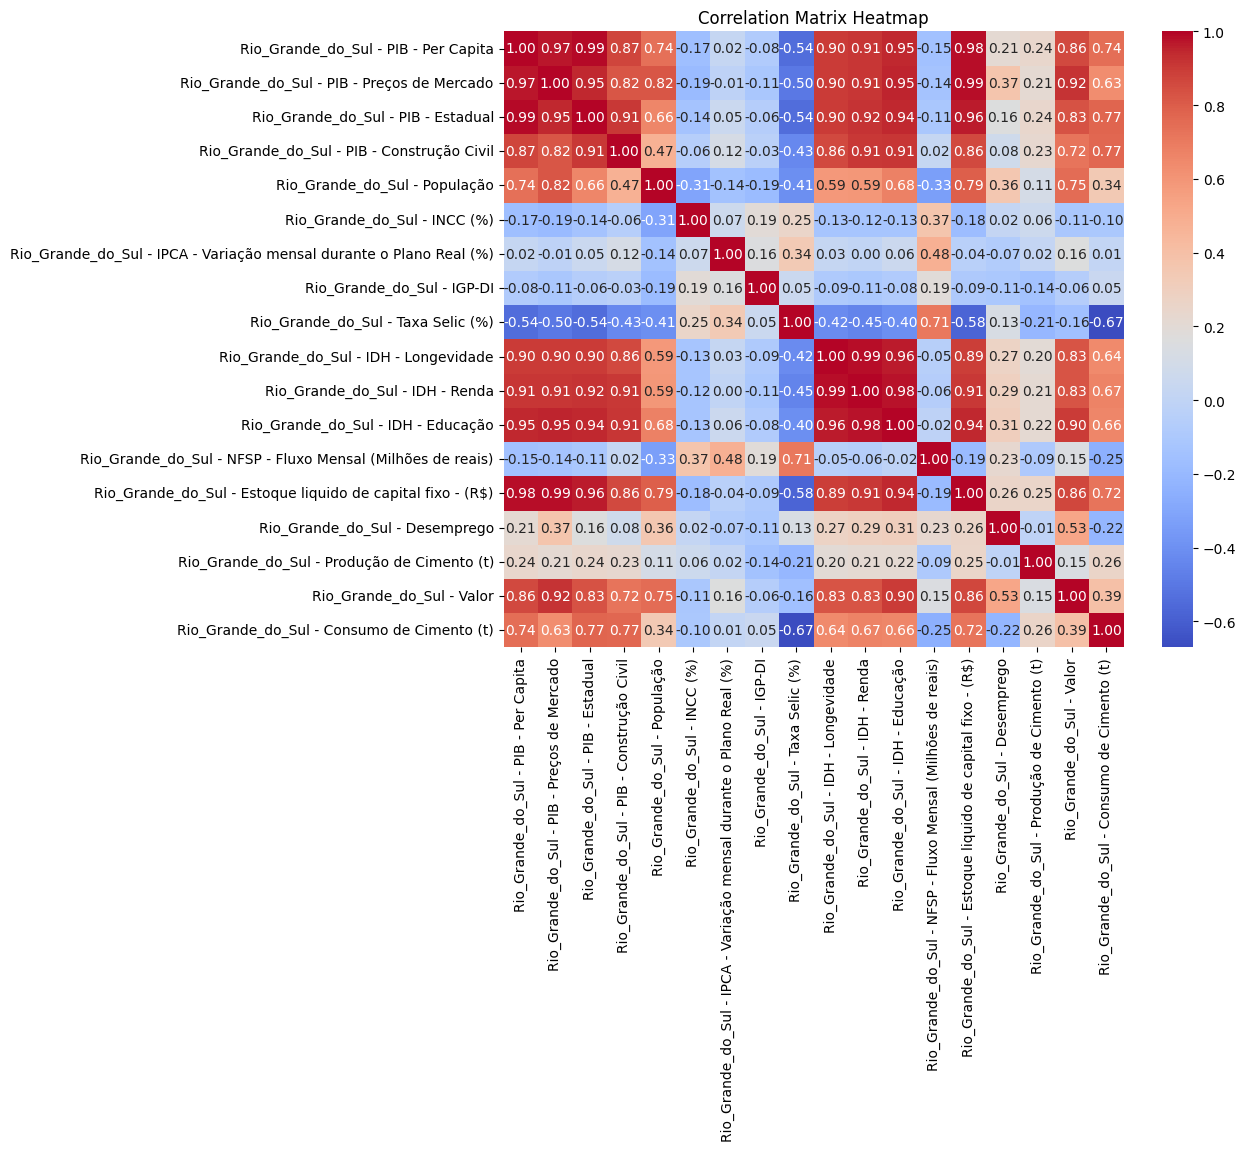

In [36]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [37]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(0.0)
input_data

,Rio_Grande_do_Sul - PIB - Per Capita,Rio_Grande_do_Sul - PIB - Preços de Mercado,Rio_Grande_do_Sul - PIB - Estadual,Rio_Grande_do_Sul - PIB - Construção Civil,Rio_Grande_do_Sul - População,Rio_Grande_do_Sul - INCC (%),Rio_Grande_do_Sul - IPCA - Variação mensal durante o Plano Real (%),Rio_Grande_do_Sul - IGP-DI,Rio_Grande_do_Sul - Taxa Selic (%),Rio_Grande_do_Sul - IDH - Longevidade,Rio_Grande_do_Sul - IDH - Renda,Rio_Grande_do_Sul - IDH - Educação,Rio_Grande_do_Sul - NFSP - Fluxo Mensal (Milhões de reais),Rio_Grande_do_Sul - Estoque liquido de capital fixo - (R$),Rio_Grande_do_Sul - Desemprego,Rio_Grande_do_Sul - Produção de Cimento (t),Rio_Grande_do_Sul - Valor
0,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,1.998868,4.052332,3.466715,2.303195,-0.906831,-0.918378,-0.910456,3.108599,-1.539424,0.292244,0.000000,-0.751279
1,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,1.647487,-0.596188,2.630940,2.745235,-0.906831,-0.918378,-0.910456,3.275709,-1.411460,0.292244,-0.887468,-0.621125
2,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,1.425561,0.131839,1.716318,2.879123,-0.906831,-0.918378,-0.910456,3.597074,-1.411460,0.292244,-0.791969,-0.490971
3,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,1.407068,0.706121,1.826703,3.016721,-0.906831,-0.918378,-0.910456,3.738475,-1.411460,0.292244,0.032520,-0.490971
4,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,0.519367,1.167355,-0.144465,3.017322,-0.906831,-0.918378,-0.910456,3.879875,-1.411460,0.292244,-0.570106,-0.490971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.239777,1.808187,1.085411,0.699358,1.624129,-0.590259,-0.966985,-1.264088,-0.729479,1.678762,1.730790,1.440402,-0.374997,1.441346,3.296366,-0.216498,1.851805
176,1.239777,1.808187,1.085411,0.699358,1.624129,-0.479297,-0.881068,-0.412544,-0.941281,1.678762,1.730790,1.440402,-0.439270,1.441346,3.296366,-0.982879,1.721651
177,1.239777,1.808187,1.085411,0.699358,1.624129,-1.034110,-0.808718,0.186692,-1.140710,1.678762,1.730790,1.440402,-0.503543,1.441346,3.296366,-0.563844,1.591497
178,1.239777,1.808187,1.085411,0.699358,1.624129,-0.571766,-0.614276,-0.633314,-1.226481,1.678762,1.730790,1.440402,-0.503543,1.441346,3.368035,0.000000,1.721651


In [38]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Rio_Grande_do_Sul - PIB - Per Capita,Rio_Grande_do_Sul - PIB - Preços de Mercado,Rio_Grande_do_Sul - PIB - Estadual,Rio_Grande_do_Sul - PIB - Construção Civil,Rio_Grande_do_Sul - População,Rio_Grande_do_Sul - INCC (%),Rio_Grande_do_Sul - IPCA - Variação mensal durante o Plano Real (%),Rio_Grande_do_Sul - IGP-DI,Rio_Grande_do_Sul - Taxa Selic (%),Rio_Grande_do_Sul - IDH - Longevidade,Rio_Grande_do_Sul - IDH - Renda,Rio_Grande_do_Sul - IDH - Educação,Rio_Grande_do_Sul - NFSP - Fluxo Mensal (Milhões de reais),Rio_Grande_do_Sul - Estoque liquido de capital fixo - (R$),Rio_Grande_do_Sul - Desemprego,Rio_Grande_do_Sul - Produção de Cimento (t),Rio_Grande_do_Sul - Valor
0,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,1.998868,4.052332,3.466715,2.303195,-0.906831,-0.918378,-0.910456,3.108599,-1.539424,0.292244,0.000000,-0.751279
1,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,1.647487,-0.596188,2.630940,2.745235,-0.906831,-0.918378,-0.910456,3.275709,-1.411460,0.292244,-0.887468,-0.621125
2,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,1.425561,0.131839,1.716318,2.879123,-0.906831,-0.918378,-0.910456,3.597074,-1.411460,0.292244,-0.791969,-0.490971
3,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,1.407068,0.706121,1.826703,3.016721,-0.906831,-0.918378,-0.910456,3.738475,-1.411460,0.292244,0.032520,-0.490971
4,-1.421119,-1.313544,-1.271998,-0.417465,-1.724140,0.519367,1.167355,-0.144465,3.017322,-0.906831,-0.918378,-0.910456,3.879875,-1.411460,0.292244,-0.570106,-0.490971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.353762,1.548273,1.248399,0.789650,1.477195,-0.238878,0.629248,-1.406012,0.272188,1.116677,0.936039,1.440402,0.794771,1.416222,1.146308,0.000000,1.721651
164,1.353762,1.548273,1.248399,0.789650,1.477195,-0.608753,0.837256,-0.112926,0.272188,1.116677,0.936039,1.440402,0.730498,1.416222,1.217977,0.000000,1.981960
165,1.353762,1.548273,1.248399,0.789650,1.477195,-0.534778,0.877953,-0.743700,0.272188,1.116677,0.936039,1.440402,0.743353,1.416222,1.289645,0.000000,2.112114
166,1.353762,1.548273,1.248399,0.789650,1.477195,-0.756703,1.000045,-0.586006,0.248413,1.116677,0.936039,1.440402,0.614807,1.416222,1.289645,0.000000,2.112114


In [39]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      168.412000
1      153.593111
2      166.196000
3      150.226000
4      154.220000
          ...    
163    244.406000
164    201.372000
165    251.369000
166    242.782000
167    201.288000
Name: Rio_Grande_do_Sul - Consumo de Cimento (t), Length: 168, dtype: float64

In [40]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [41]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [42]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Rio_Grande_do_Sul - PIB - Per Capita,Rio_Grande_do_Sul - PIB - Preços de Mercado,Rio_Grande_do_Sul - PIB - Estadual,Rio_Grande_do_Sul - PIB - Construção Civil,Rio_Grande_do_Sul - População,Rio_Grande_do_Sul - INCC (%),Rio_Grande_do_Sul - IPCA - Variação mensal durante o Plano Real (%),Rio_Grande_do_Sul - IGP-DI,Rio_Grande_do_Sul - Taxa Selic (%),Rio_Grande_do_Sul - IDH - Longevidade,Rio_Grande_do_Sul - IDH - Renda,Rio_Grande_do_Sul - IDH - Educação,Rio_Grande_do_Sul - NFSP - Fluxo Mensal (Milhões de reais),Rio_Grande_do_Sul - Estoque liquido de capital fixo - (R$),Rio_Grande_do_Sul - Desemprego,Rio_Grande_do_Sul - Produção de Cimento (t),Rio_Grande_do_Sul - Valor
132,1.329539,1.010762,1.299540,1.229988,1.157116,-0.960135,1.058830,0.297077,-0.755853,0.554591,0.936039,1.112375,-0.285015,0.834026,-0.000390,-0.992399,0.550263
133,1.329539,1.010762,1.299540,1.229988,1.157116,0.482379,-1.364912,-0.160234,-0.688658,0.554591,0.936039,1.112375,-0.349288,1.129318,0.357954,0.000000,0.550263
134,1.329539,1.010762,1.299540,1.229988,1.157116,-0.534778,-1.052901,0.549386,-0.626634,0.554591,0.936039,1.112375,-0.374997,1.129318,0.572959,-0.167185,0.550263
135,1.329539,1.010762,1.299540,1.229988,1.157116,-0.627247,-0.627842,1.542855,-0.571481,0.554591,0.936039,1.112375,-0.259306,1.129318,0.429622,0.000000,0.680417
136,1.329539,1.010762,1.299540,1.229988,1.157116,0.482379,-0.320352,-0.081387,-0.516512,0.554591,0.936039,1.112375,-0.053632,1.129318,0.286285,0.000000,0.680417
137,1.329539,1.010762,1.299540,1.229988,1.157116,2.646150,-0.107822,-1.500628,-0.510405,0.554591,0.936039,1.112375,0.023495,1.129318,0.142948,0.000000,0.810572
138,1.329539,1.010762,1.299540,1.229988,1.157116,0.075516,0.082098,-1.784477,-0.510405,0.554591,0.936039,1.112375,-0.002214,1.129318,0.071279,3.147828,0.810572
139,1.329539,1.010762,1.299540,1.229988,1.157116,0.241960,0.086620,-1.658322,-0.510405,0.554591,0.936039,1.112375,-0.143614,1.129318,-0.072058,0.000000,0.810572
140,1.329539,1.010762,1.299540,1.229988,1.157116,-0.997122,0.204189,-0.696392,-0.510054,0.554591,0.936039,1.112375,-0.182178,1.129318,-0.215395,0.000000,0.940726
141,1.329539,1.010762,1.299540,1.229988,1.157116,-0.867666,0.470982,-0.759469,-0.510405,0.554591,0.936039,1.112375,-0.105051,1.129318,-0.358733,0.000000,0.940726


In [43]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [44]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [45]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(72, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [46]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [47]:
winner_seed = get_a_good_seed(reshaped_train, 
                              reshaped_target, 
                              reshaped_test, 
                              reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[3847187331, 80654301, 2235340665, 3588028960, 3200031123, 2479113281, 4060964426, 3473632199, 2523252971, 392817489]


Step: 0 ___________________________________________
val_loss: 605.30712890625
winner_seed: 3847187331


Step: 1 ___________________________________________
val_loss: 443.5943298339844
winner_seed: 80654301


Step: 2 ___________________________________________
val_loss: 481.17950439453125


Step: 3 ___________________________________________
val_loss: 447.1127624511719


Step: 4 ___________________________________________
val_loss: 492.51812744140625


Step: 5 ___________________________________________
val_loss: 459.88720703125


Step: 6 ___________________________________________
val_loss: 524.7960815429688


Step: 7 ___________________________________________
val_loss: 439.9266662597656
winner_seed: 3473632199


Step: 8 ___________________________________________
val_loss: 409.6488342285156
winner_seed: 2523252971


Step: 9 __________________________________________

In [48]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 1668180562

Epoch 1/10000
4/4 [==============================] - 2s 116ms/step - loss: 54363.7422 - val_loss: 613.9428
Epoch 2/10000
4/4 [==============================] - 0s 7ms/step - loss: 1937.3755 - val_loss: 1628.3704
Epoch 3/10000
4/4 [==============================] - 0s 7ms/step - loss: 1232.5577 - val_loss: 1653.7858
Epoch 4/10000
4/4 [==============================] - 0s 7ms/step - loss: 1196.5233 - val_loss: 1816.5189
Epoch 5/10000
4/4 [==============================] - 0s 7ms/step - loss: 1185.8779 - val_loss: 1587.7744
Epoch 6/10000
4/4 [==============================] - 0s 7ms/step - loss: 1200.9484 - val_loss: 1823.8300
Epoch 7/10000
4/4 [==============================] - 0s 7ms/step - loss: 1212.0217 - val_loss: 1617.8141
Epoch 8/10000
4/4 [==============================] - 0s 7ms/step - loss: 1193.9547 - val_loss: 2068.1316
Epoch 9/10000
4/4 [==============================] - 0s 7ms/step - loss: 1156.5339 - val_loss: 2019.1487
Epoch 10/10000
4/4 [==============================] -

4/4 [==============================] - 0s 7ms/step - loss: 378.9791 - val_loss: 449.9605
Epoch 80/10000
4/4 [==============================] - 0s 7ms/step - loss: 369.4706 - val_loss: 467.8738
Epoch 81/10000
4/4 [==============================] - 0s 7ms/step - loss: 354.5485 - val_loss: 464.5666
Epoch 82/10000
4/4 [==============================] - 0s 7ms/step - loss: 349.9917 - val_loss: 464.4783
Epoch 83/10000
4/4 [==============================] - 0s 7ms/step - loss: 342.0769 - val_loss: 451.2905
Epoch 84/10000
4/4 [==============================] - 0s 7ms/step - loss: 363.5128 - val_loss: 455.3224
Epoch 85/10000
4/4 [==============================] - 0s 7ms/step - loss: 350.1720 - val_loss: 446.3808
Epoch 86/10000
4/4 [==============================] - 0s 7ms/step - loss: 373.0473 - val_loss: 461.4022
Epoch 87/10000
4/4 [==============================] - 0s 7ms/step - loss: 354.3033 - val_loss: 457.2030
Epoch 88/10000
4/4 [==============================] - 0s 7ms/step - loss: 368.1

4/4 [==============================] - 0s 7ms/step - loss: 311.6638 - val_loss: 432.2536
Epoch 158/10000
4/4 [==============================] - 0s 7ms/step - loss: 314.6230 - val_loss: 433.4948
Epoch 159/10000
4/4 [==============================] - 0s 7ms/step - loss: 324.9852 - val_loss: 451.6624
Epoch 160/10000
4/4 [==============================] - 0s 8ms/step - loss: 329.5761 - val_loss: 439.1339
Epoch 161/10000
4/4 [==============================] - 0s 7ms/step - loss: 331.9336 - val_loss: 434.8107
Epoch 162/10000
4/4 [==============================] - 0s 7ms/step - loss: 334.2011 - val_loss: 435.8592
Epoch 163/10000
4/4 [==============================] - 0s 7ms/step - loss: 316.2703 - val_loss: 427.0102
Epoch 164/10000
4/4 [==============================] - 0s 7ms/step - loss: 314.4163 - val_loss: 426.4153
Epoch 165/10000
4/4 [==============================] - 0s 7ms/step - loss: 337.2587 - val_loss: 423.9348
Epoch 166/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 280.7783 - val_loss: 450.8642
Epoch 236/10000
4/4 [==============================] - 0s 7ms/step - loss: 276.8137 - val_loss: 449.7324
Epoch 237/10000
4/4 [==============================] - 0s 7ms/step - loss: 275.6452 - val_loss: 463.5151
Epoch 238/10000
4/4 [==============================] - 0s 7ms/step - loss: 278.9931 - val_loss: 490.6813
Epoch 239/10000
4/4 [==============================] - 0s 7ms/step - loss: 275.7062 - val_loss: 435.3434
Epoch 240/10000
4/4 [==============================] - 0s 7ms/step - loss: 280.8442 - val_loss: 466.6636
Epoch 241/10000
4/4 [==============================] - 0s 7ms/step - loss: 298.6606 - val_loss: 483.4705
Epoch 242/10000
4/4 [==============================] - 0s 7ms/step - loss: 281.0551 - val_loss: 446.2125
Epoch 243/10000
4/4 [==============================] - 0s 7ms/step - loss: 273.5326 - val_loss: 454.3099
Epoch 244/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 261.8897 - val_loss: 585.9056
Epoch 314/10000
4/4 [==============================] - 0s 7ms/step - loss: 260.0725 - val_loss: 501.8797
Epoch 315/10000
4/4 [==============================] - 0s 7ms/step - loss: 256.1789 - val_loss: 557.4700
Epoch 316/10000
4/4 [==============================] - 0s 7ms/step - loss: 250.5927 - val_loss: 586.4249
Epoch 317/10000
4/4 [==============================] - 0s 7ms/step - loss: 265.7741 - val_loss: 582.4543
Epoch 318/10000
4/4 [==============================] - 0s 7ms/step - loss: 260.3964 - val_loss: 595.7648
Epoch 319/10000
4/4 [==============================] - 0s 7ms/step - loss: 252.3591 - val_loss: 555.8461
Epoch 320/10000
4/4 [==============================] - 0s 7ms/step - loss: 253.6338 - val_loss: 549.6708
Epoch 321/10000
4/4 [==============================] - 0s 7ms/step - loss: 250.5035 - val_loss: 581.4645
Epoch 322/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 242.9338 - val_loss: 691.4462
Epoch 392/10000
4/4 [==============================] - 0s 7ms/step - loss: 239.9473 - val_loss: 667.7680
Epoch 393/10000
4/4 [==============================] - 0s 7ms/step - loss: 257.4569 - val_loss: 688.4479
Epoch 394/10000
4/4 [==============================] - 0s 7ms/step - loss: 237.3412 - val_loss: 670.7186
Epoch 395/10000
4/4 [==============================] - 0s 7ms/step - loss: 253.0422 - val_loss: 686.9269
Epoch 396/10000
4/4 [==============================] - 0s 7ms/step - loss: 229.1922 - val_loss: 676.2153
Epoch 397/10000
4/4 [==============================] - 0s 7ms/step - loss: 232.2630 - val_loss: 680.6123
Epoch 398/10000
4/4 [==============================] - 0s 7ms/step - loss: 238.5975 - val_loss: 693.4960
Epoch 399/10000
4/4 [==============================] - 0s 7ms/step - loss: 230.5831 - val_loss: 672.0513
Epoch 400/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 215.7253 - val_loss: 692.6307
Epoch 470/10000
4/4 [==============================] - 0s 7ms/step - loss: 201.3000 - val_loss: 721.4778
Epoch 471/10000
4/4 [==============================] - 0s 7ms/step - loss: 201.0963 - val_loss: 738.9909
Epoch 472/10000
4/4 [==============================] - 0s 7ms/step - loss: 219.6275 - val_loss: 772.6815
Epoch 473/10000
4/4 [==============================] - 0s 7ms/step - loss: 223.0520 - val_loss: 679.4847
Epoch 474/10000
4/4 [==============================] - 0s 7ms/step - loss: 211.6806 - val_loss: 687.3488
Epoch 475/10000
4/4 [==============================] - 0s 7ms/step - loss: 217.9595 - val_loss: 719.0155
Epoch 476/10000
4/4 [==============================] - 0s 7ms/step - loss: 216.9473 - val_loss: 692.3378
Epoch 477/10000
4/4 [==============================] - 0s 7ms/step - loss: 206.7237 - val_loss: 704.6195
Epoch 478/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 169.1799 - val_loss: 741.2045
Epoch 548/10000
4/4 [==============================] - 0s 7ms/step - loss: 167.5016 - val_loss: 744.3278
Epoch 549/10000
4/4 [==============================] - 0s 7ms/step - loss: 216.5363 - val_loss: 752.2480
Epoch 550/10000
4/4 [==============================] - 0s 7ms/step - loss: 172.6553 - val_loss: 767.2907
Epoch 551/10000
4/4 [==============================] - 0s 7ms/step - loss: 190.3429 - val_loss: 791.1129
Epoch 552/10000
4/4 [==============================] - 0s 7ms/step - loss: 164.3332 - val_loss: 741.8623
Epoch 553/10000
4/4 [==============================] - 0s 7ms/step - loss: 168.5835 - val_loss: 699.2812
Epoch 554/10000
4/4 [==============================] - 0s 7ms/step - loss: 170.7691 - val_loss: 710.0064
Epoch 555/10000
4/4 [==============================] - 0s 7ms/step - loss: 174.8951 - val_loss: 708.4710
Epoch 556/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 120.6115 - val_loss: 677.0069
Epoch 626/10000
4/4 [==============================] - 0s 7ms/step - loss: 81.6558 - val_loss: 708.4009
Epoch 627/10000
4/4 [==============================] - 0s 7ms/step - loss: 90.7176 - val_loss: 671.7025
Epoch 628/10000
4/4 [==============================] - 0s 7ms/step - loss: 81.4415 - val_loss: 685.6954
Epoch 629/10000
4/4 [==============================] - 0s 7ms/step - loss: 91.5049 - val_loss: 665.0124
Epoch 630/10000
4/4 [==============================] - 0s 7ms/step - loss: 107.6092 - val_loss: 763.6476
Epoch 631/10000
4/4 [==============================] - 0s 7ms/step - loss: 102.8882 - val_loss: 717.6147
Epoch 632/10000
4/4 [==============================] - 0s 7ms/step - loss: 98.0801 - val_loss: 652.5020
Epoch 633/10000
4/4 [==============================] - 0s 7ms/step - loss: 92.4242 - val_loss: 709.1553
Epoch 634/10000
4/4 [==============================] - 0s 7ms/step - loss: 97

Epoch 704/10000
4/4 [==============================] - 0s 7ms/step - loss: 60.7800 - val_loss: 677.6348
Epoch 705/10000
4/4 [==============================] - 0s 7ms/step - loss: 65.2536 - val_loss: 691.2916
Epoch 706/10000
4/4 [==============================] - 0s 7ms/step - loss: 74.2681 - val_loss: 659.3579
Epoch 707/10000
4/4 [==============================] - 0s 7ms/step - loss: 94.5604 - val_loss: 692.3639
Epoch 708/10000
4/4 [==============================] - 0s 11ms/step - loss: 104.7056 - val_loss: 692.4088
Epoch 709/10000
4/4 [==============================] - 0s 7ms/step - loss: 81.8354 - val_loss: 655.3863
Epoch 710/10000
4/4 [==============================] - 0s 7ms/step - loss: 68.4020 - val_loss: 750.7173
Epoch 711/10000
4/4 [==============================] - 0s 7ms/step - loss: 94.3784 - val_loss: 714.9784
Epoch 712/10000
4/4 [==============================] - 0s 7ms/step - loss: 61.7624 - val_loss: 697.3461
Epoch 713/10000
4/4 [==============================] - 0s 7ms/

Epoch 783/10000
4/4 [==============================] - 0s 7ms/step - loss: 68.6814 - val_loss: 665.1273
Epoch 784/10000
4/4 [==============================] - 0s 7ms/step - loss: 56.1727 - val_loss: 671.7789
Epoch 785/10000
4/4 [==============================] - 0s 7ms/step - loss: 55.2146 - val_loss: 676.8830
Epoch 786/10000
4/4 [==============================] - 0s 7ms/step - loss: 48.8589 - val_loss: 650.1450
Epoch 787/10000
4/4 [==============================] - 0s 7ms/step - loss: 64.0707 - val_loss: 690.4144
Epoch 788/10000
4/4 [==============================] - 0s 7ms/step - loss: 53.1359 - val_loss: 663.3141
Epoch 789/10000
4/4 [==============================] - 0s 7ms/step - loss: 44.0853 - val_loss: 680.7609
Epoch 790/10000
4/4 [==============================] - 0s 7ms/step - loss: 47.8225 - val_loss: 745.2586
Epoch 791/10000
4/4 [==============================] - 0s 7ms/step - loss: 56.9121 - val_loss: 639.3790
Epoch 792/10000
4/4 [==============================] - 0s 7ms/st

Epoch 862/10000
4/4 [==============================] - 0s 7ms/step - loss: 56.3068 - val_loss: 667.0569
Epoch 863/10000
4/4 [==============================] - 0s 7ms/step - loss: 54.1073 - val_loss: 608.4168
Epoch 864/10000
4/4 [==============================] - 0s 7ms/step - loss: 53.7898 - val_loss: 595.5245
Epoch 865/10000
4/4 [==============================] - 0s 7ms/step - loss: 42.6952 - val_loss: 621.4000
Epoch 866/10000
4/4 [==============================] - 0s 7ms/step - loss: 48.2406 - val_loss: 637.4515
Epoch 867/10000
4/4 [==============================] - 0s 7ms/step - loss: 47.3678 - val_loss: 625.5844
Epoch 868/10000
4/4 [==============================] - 0s 7ms/step - loss: 39.9918 - val_loss: 603.1730
Epoch 869/10000
4/4 [==============================] - 0s 7ms/step - loss: 46.1658 - val_loss: 609.9081
Epoch 870/10000
4/4 [==============================] - 0s 7ms/step - loss: 45.9387 - val_loss: 642.0358
Epoch 871/10000
4/4 [==============================] - 0s 7ms/st

Epoch 941/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.0468 - val_loss: 660.6241
Epoch 942/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.7981 - val_loss: 706.2142
Epoch 943/10000
4/4 [==============================] - 0s 7ms/step - loss: 52.1807 - val_loss: 668.4979
Epoch 944/10000
4/4 [==============================] - 0s 7ms/step - loss: 45.8460 - val_loss: 670.5848
Epoch 945/10000
4/4 [==============================] - 0s 7ms/step - loss: 46.3325 - val_loss: 632.9274
Epoch 946/10000
4/4 [==============================] - 0s 7ms/step - loss: 45.2356 - val_loss: 631.2045
Epoch 947/10000
4/4 [==============================] - 0s 7ms/step - loss: 46.9652 - val_loss: 647.6765
Epoch 948/10000
4/4 [==============================] - 0s 7ms/step - loss: 40.2768 - val_loss: 662.6979
Epoch 949/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.5157 - val_loss: 684.4035
Epoch 950/10000
4/4 [==============================] - 0s 7ms/st

4/4 [==============================] - 0s 7ms/step - loss: 36.4406 - val_loss: 715.4944
Epoch 1020/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.6285 - val_loss: 695.5895
Epoch 1021/10000
4/4 [==============================] - 0s 7ms/step - loss: 33.1435 - val_loss: 654.2445
Epoch 1022/10000
4/4 [==============================] - 0s 7ms/step - loss: 38.5208 - val_loss: 714.7996
Epoch 1023/10000
4/4 [==============================] - 0s 7ms/step - loss: 36.9280 - val_loss: 716.3413
Epoch 1024/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.0297 - val_loss: 689.3221
Epoch 1025/10000
4/4 [==============================] - 0s 7ms/step - loss: 34.3159 - val_loss: 695.3824
Epoch 1026/10000
4/4 [==============================] - 0s 7ms/step - loss: 33.6999 - val_loss: 681.2995
Epoch 1027/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.4380 - val_loss: 652.4359
Epoch 1028/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 32.1954 - val_loss: 641.6655
Epoch 1098/10000
4/4 [==============================] - 0s 7ms/step - loss: 42.3957 - val_loss: 780.4334
Epoch 1099/10000
4/4 [==============================] - 0s 7ms/step - loss: 54.3979 - val_loss: 689.5189
Epoch 1100/10000
4/4 [==============================] - 0s 7ms/step - loss: 33.8898 - val_loss: 694.0084
Epoch 1101/10000
4/4 [==============================] - 0s 7ms/step - loss: 39.4112 - val_loss: 717.6677
Epoch 1102/10000
4/4 [==============================] - 0s 7ms/step - loss: 32.2649 - val_loss: 676.0573
Epoch 1103/10000
4/4 [==============================] - 0s 7ms/step - loss: 33.2838 - val_loss: 641.9412
Epoch 1104/10000
4/4 [==============================] - 0s 7ms/step - loss: 37.0282 - val_loss: 631.0264
Epoch 1105/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.4497 - val_loss: 843.4071
Epoch 1106/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 41.8442 - val_loss: 603.8820
Epoch 1176/10000
4/4 [==============================] - 0s 7ms/step - loss: 41.2638 - val_loss: 641.2650
Epoch 1177/10000
4/4 [==============================] - 0s 7ms/step - loss: 46.3744 - val_loss: 612.5121
Epoch 1178/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.1853 - val_loss: 624.5303
Epoch 1179/10000
4/4 [==============================] - 0s 7ms/step - loss: 31.1753 - val_loss: 613.0836
Epoch 1180/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.3043 - val_loss: 634.5224
Epoch 1181/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.2953 - val_loss: 628.9257
Epoch 1182/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.0910 - val_loss: 614.4437
Epoch 1183/10000
4/4 [==============================] - 0s 7ms/step - loss: 33.2091 - val_loss: 599.6320
Epoch 1184/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 30.8552 - val_loss: 595.5648
Epoch 1254/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.0102 - val_loss: 619.5855
Epoch 1255/10000
4/4 [==============================] - 0s 9ms/step - loss: 29.0964 - val_loss: 621.0013
Epoch 1256/10000
4/4 [==============================] - 0s 7ms/step - loss: 26.4971 - val_loss: 620.6276
Epoch 1257/10000
4/4 [==============================] - 0s 8ms/step - loss: 27.0902 - val_loss: 682.9257
Epoch 1258/10000
4/4 [==============================] - 0s 8ms/step - loss: 30.6626 - val_loss: 655.5274
Epoch 1259/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.6635 - val_loss: 710.7366
Epoch 1260/10000
4/4 [==============================] - 0s 7ms/step - loss: 35.0949 - val_loss: 601.8480
Epoch 1261/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.6640 - val_loss: 614.4528
Epoch 1262/10000
4/4 [==============================] - 0s 7ms/step - lo

4/4 [==============================] - 0s 7ms/step - loss: 26.1355 - val_loss: 616.7287
Epoch 1332/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.0942 - val_loss: 623.0026
Epoch 1333/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.9728 - val_loss: 624.1464
Epoch 1334/10000
4/4 [==============================] - 0s 7ms/step - loss: 24.4177 - val_loss: 645.2696
Epoch 1335/10000
4/4 [==============================] - 0s 7ms/step - loss: 27.3800 - val_loss: 630.7323
Epoch 1336/10000
4/4 [==============================] - 0s 7ms/step - loss: 29.2808 - val_loss: 627.6651
Epoch 1337/10000
4/4 [==============================] - 0s 7ms/step - loss: 23.5140 - val_loss: 623.7850
Epoch 1338/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.2603 - val_loss: 603.8415
Epoch 1339/10000
4/4 [==============================] - 0s 7ms/step - loss: 28.3256 - val_loss: 670.0522
Epoch 1340/10000
4/4 [==============================] - 0s 8ms/step - lo

In [49]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [50]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 13ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,218.143417,214.366699,246.752838,215.082809,242.764771,236.129425,238.027527,251.260345,220.111572,221.132019,226.029083,229.570496
Target,226.547,228.5,223.896,234.132,207.586,228.583,234.565,249.519,230.086,233.136,233.8,223.214
Error,8.40358,14.133301,22.856842,19.049194,35.178772,7.546432,3.462524,1.741348,9.974426,12.003983,7.77092,6.356491


In [51]:
display(mae)
display(mape)

12.373151

0.05526412

In [52]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [53]:
errors, mae, mape = year_mae_mape_calculator(trained_model,
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 16ms/step
Ano-11: |Prediction[[2759.3713]] - Target[2753.5640000000003]| =  Error: [[5.807373]]; MAPE:[[0.00210904]]


[array([[5.807373]], dtype=float32)]

5.807373

0.0021090386